In [1]:
import numpy as np
from sklearn import preprocessing
import matplotlib.image as im
import matplotlib.pyplot as plt

In [2]:
img = im.imread("D:/2021spring/statistic compute with python/hw03/gw.bmp")

In [3]:
img_nor=img-np.min(img,axis=0)

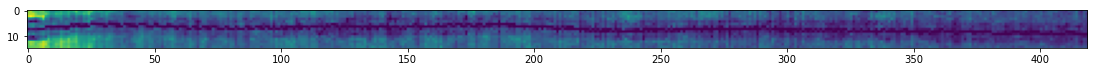

In [4]:
plt.figure(figsize=(19,19))
plt.imshow(img_nor)

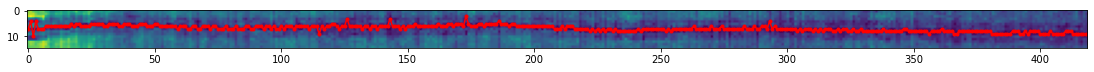

In [5]:
min_loc = np.argmin(img,axis=0)
plt.figure(figsize=(19,19))
plt.imshow(img_nor)
plt.plot(min_loc,'r.-')

In [6]:
sample = img_nor

# problem b)
$D_n(C_{n-1}) = min_{C_n}[I(C_n,n)+\alpha(C_n - C_{n-1})^2]$\
$D_{n-1}(C_{n-2}) = min_{C_{n-1},C_{n}}[I(C_{n-1},n-1)+\alpha(C_{n-1} - C_{n-2})^2+I(C_n,n)+\alpha(C_n - C_{n-1})^2]$\
$D_{n-1}(C_{n-2}) = min_{C_{n-1}}[I(C_{n-1},n-1)+\alpha(C_{n-1} - C_{n-2})^2+D_n(C_{n-1})]$\
.......................................\
.......................................\
$D_{i}(C_{i-1}) = min_{C_i}[I(C_i,i)+\alpha(C_i - C_{i-1})^2+D_{i+1}(C_i)]$\
.......................................\
.......................................\
$D_2(C_1) = min_{C_2}[I(C_2,2)+\alpha(C_2 - C_1)^2+D_3(C_2)]$\
$D_1 = min_{C_1}[I(C_1,1)+D_2(C_1)]$

In [7]:
dis = np.zeros((15,15))
for i in range(1,16,1):
    for j in range(1,16,1):
        dis[i-1,j-1]=(i-j)**2

In [8]:
def vars(a, axis=0):
    """ Variance of sparse matrix a
    var = mean(a**2) - mean(a)**2
    """
    a_squared = a.copy()
    a_squared.data **= 2
    return a_squared.mean(axis) - np.square(a.mean(axis))

$dis = (C_n - C_{n-1})^2$ 

In [9]:
def dyp (I,alpha,dis,i):
    m,n = I.shape
    if i == n-1:
        cost_list=[]
        Z=I[:,i]+alpha*dis
        Zmin=np.min(Z,axis=1)
        cost_list.append(Zmin)
        return cost_list  #return a vector with a min value for every row
    else:
        cost_list=dyp(I,alpha,dis,i+1)
        Z=I[:,i]+alpha*dis+cost_list[-1]
        Zmin=np.min(Z,axis=1)
        cost_list.append(Zmin)
        return cost_list

In [10]:
m,n=sample.shape
alpha = 1
cost_list = dyp(sample,alpha,dis,1)
pathlist=[]
D1 = np.min(sample[:,0]+cost_list[-1])
print("problem c:")
print("with a = 1,the minimum value is %s"%(D1))
C1 = np.argmin(sample[:,0]+cost_list[-1])
pathlist.append(C1)

for i in range(1,n-1):
    del cost_list[-1] # delete the last column then cost match
    loc_prev=pathlist[-1]
    D = np.min(sample[:,i]+alpha*dis[loc_prev,:]+cost_list[-1])
    C = np.argmin(sample[:,i]+alpha*dis[loc_prev,:]+cost_list[-1])
    pathlist.append(C)

problem c:
with a = 1,the minimum value is 186.0


problem d:
red line is for the a = 1:
blue line is for the a = 10


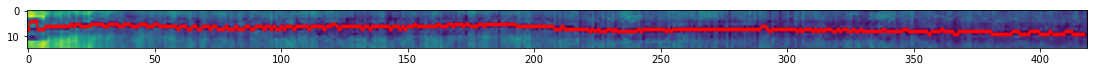

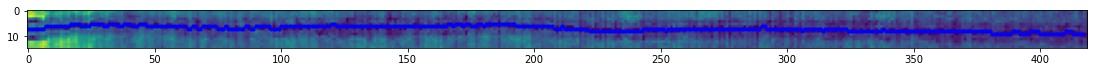

In [11]:
loc_prev=pathlist[-1]
C = np.argmin(sample[:,-1]+alpha*dis[loc_prev,:]) 
print("problem d:")
print("red line is for the a = 1:")
plt.figure(figsize=(19,19))
plt.imshow(img_nor)
plt.plot(pathlist,'r.-')



m,n=sample.shape
alpha = 10
cost_list = dyp(sample,alpha,dis,1)
pathlist=[]
D1 = np.min(sample[:,0]+cost_list[-1])
C1 = np.argmin(sample[:,0]+cost_list[-1])
pathlist.append(C1)
for i in range(1,n-1):
    del cost_list[-1] # delete the last column cost_list 
    loc_prev=pathlist[-1]
    D = np.min(sample[:,i]+alpha*dis[loc_prev,:]+cost_list[-1])
    C = np.argmin(sample[:,i]+alpha*dis[loc_prev,:]+cost_list[-1])
    pathlist.append(C)

loc_prev=pathlist[-1]
C = np.argmin(sample[:,-1]+alpha*dis[loc_prev,:]) 
print("blue line is for the a = 10")
plt.figure(figsize=(19,19))
plt.imshow(img_nor)
plt.plot(pathlist,'b.-')